In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import cv2 
import os
import PIL
from tensorflow  import keras
from tensorflow.keras.models import Sequential
import pathlib


In [7]:
# import cv2
# import os

# # Path to the folder containing the images
# path = r'C:\Users\Mohamed Gad\OneDrive\Desktop\3Plants\Data\Strawberry'

# # Loop through all the files in the folder
# for filename in os.listdir(path):
#     # Read the image
#     img = cv2.imread(os.path.join(path, filename))

#     # Convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Save the grayscale image
#     cv2.imwrite(os.path.join(path,filename), gray)

In [9]:
data_dir = r'C:\Users\Mohamed Gad\OneDrive\Desktop\3Plants\Data'
data_dir = pathlib.Path (data_dir)
data_dir

WindowsPath('C:/Users/Mohamed Gad/OneDrive/Desktop/3Plants/Data')

In [10]:
image_count = len (list(data_dir.glob('*/*.jpg')))
image_count

7822

In [11]:
plant_images_dict = {
    'Maize' : list (data_dir.glob('Maize/*')),
    'Strawberry' : list (data_dir.glob('Strawberry/*')),
    'Wheat' : list (data_dir.glob('Wheat/*')),
}

In [12]:
plant_labels_dict = {
  'Maize' : 0,
  'Strawberry' : 1,
  'Wheat' : 2,
}

In [13]:
X, y = [], []
for plant_name, images in plant_images_dict.items() :
    for image in images :
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (256,256))
        X.append(resized_img)
        y.append(plant_labels_dict[plant_name])
        

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, random_state=32)

In [16]:
X_train_scaled = X_train/ 255.0
X_test_scaled = X_test/ 255.0
X_train_scaled.shape

(5866, 256, 256, 3)

In [11]:
# data_augmentation = tf.keras.Sequential([
#   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.3),
#   layers.experimental.preprocessing.RandomContrast(0.3),
    
# ])

In [17]:
n_classes = 3
modelv2 = Sequential([
    layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
# from keras.callbacks import EarlyStopping
# early = EarlyStopping(monitor = 'val_accuracy',min_delta=0,patience=20,verbose=1,mode='auto')
modelv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history= modelv2.fit(X_train_scaled, y_train,validation_split=0.1 , epochs=5)

Epoch 1/5
165/165 [==============================] - 168s 1s/step - loss: 0.1287 - accuracy: 0.9496 - val_loss: 0.2492 - val_accuracy: 0.9114
Epoch 2/5
165/165 [==============================] - 150s 909ms/step - loss: 0.0972 - accuracy: 0.9606 - val_loss: 0.1878 - val_accuracy: 0.9319
Epoch 3/5
165/165 [==============================] - 148s 899ms/step - loss: 0.0840 - accuracy: 0.9680 - val_loss: 0.2046 - val_accuracy: 0.9284
Epoch 4/5
165/165 [==============================] - 145s 880ms/step - loss: 0.1048 - accuracy: 0.9617 - val_loss: 0.2041 - val_accuracy: 0.9267
Epoch 5/5
165/165 [==============================] - 147s 893ms/step - loss: 0.0698 - accuracy: 0.9748 - val_loss: 0.2305 - val_accuracy: 0.9370


In [26]:
modelv2.evaluate(X_test_scaled, y_test)

62/62 [==============================] - 13s 181ms/step - loss: 0.3026 - accuracy: 0.9131


[0.302585631608963, 0.9130879640579224]

In [27]:
modelv2.save("3PlantFinal.h5")

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = modelv2.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print ('Classification Report : \n', classification_report(y_test, y_pred_classes))

62/62 [==============================] - 14s 193ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       755
           1       0.83      0.89      0.86       472
           2       0.92      0.86      0.89       729

    accuracy                           0.91      1956
   macro avg       0.90      0.91      0.91      1956
weighted avg       0.91      0.91      0.91      1956



In [29]:
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_classes)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[738,   5,  12],
       [ 11, 419,  42],
       [ 21,  79, 629]])>

Text(69.0, 0.5, 'True')

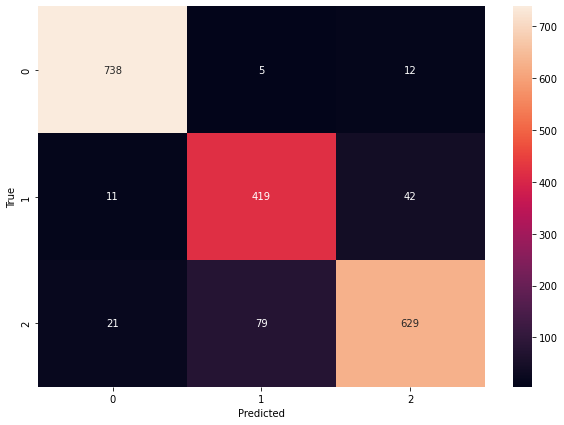

In [30]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

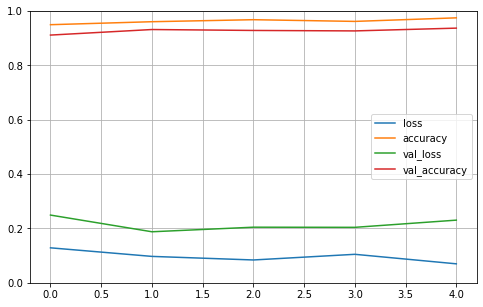

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()